# **Lecture 5:** Data Input and Output (and some simple plots)

This notebook will primarily introduce the `pandas` dataframe 

We will use `matplotlib` for visualization of data in this notebook.  `pandas` dataframes are better handled by `seaborn` which is in the next lecture. 

We will use `pandas` as our primary tool for getting data into and out of python.  

## Data I/O

Data is going to arrive to you in a variety of formats.

- pickle files 
    - Python's native file format .pkl, is good for personal use, but not for sharing.
    - if someone offers you a .pkl file to download just dont.

- csv, xls files 

    - Probably the most common files for data science applications, and the `pandas` module provides great tools for interacting with them. 
    - csv stands for comma separated values.
    - xls stands for Excel spreadsheets.   

 



A side note about matlab. 

### MATLAB (.mat) hdf5 storage 

One case of particular interest for your projects may be reading in from matlab's native format (.mat). \
I am a fan of this format for neuroscience data.
Its not actually a Matlab format but a database format called hdf5. 

There are some matlab readers built in to the `scipy` module but they dont read hdf5 which is the modern .mat format. 

To be able to read these in, I recommend you use the `hdf5storage` module which you can install with **pip**. 
Its the only module that I find cleanly writes files that can be read and written by python and matlab. 

    (base) $ pip install hdf5storage 


usually we import `pandas` with the short form `pd`

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# This creates a DataFrame called candy_data
candy_data = pd.read_csv('candy-data.csv')
print(candy_data)

                competitorname  chocolate  fruity  caramel  peanutyalmondy  \
0                    100 Grand          1       0        1               0   
1                 3 Musketeers          1       0        0               0   
2                     One dime          0       0        0               0   
3                  One quarter          0       0        0               0   
4                    Air Heads          0       1        0               0   
..                         ...        ...     ...      ...             ...   
80                   Twizzlers          0       1        0               0   
81                    Warheads          0       1        0               0   
82        WelchÕs Fruit Snacks          0       1        0               0   
83  WertherÕs Original Caramel          0       0        1               0   
84                    Whoppers          1       0        0               0   

    nougat  crispedricewafer  hard  bar  pluribus  sugarpercent

### Columns/Keys 
* The most important property of a **DataFrame** is its **columns**   
* A general label for this type of indexing is "keys" 
* **Keys** are a label assigned to each column of the csv or xls file. 
*  Pandas will automatically assign the column headers of your xls or csv files as keys if it finds them. 
* This is similar to a dictionary, but is more restricted. 
* In a dictionary, you can combine together various types of information and assign each one a key. 
* In a data frame, each key corresponds to the column of a table, and each column is a list or array **OF EXACTLY THE SAME LENGTH**

In [3]:
print(candy_data.columns)
print(candy_data.keys())


Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')
Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')


* We obtain the values of each of the variables, by passing the **key** to the **DataFrame**

In [5]:
candyname = candy_data['competitorname']
is_choco = candy_data['chocolate']
win_percent = candy_data['winpercent']
sugar_percent = candy_data['sugarpercent']

* The `pandas` datatype is called a **Series** rather than an array.  Let's see what we can do with it.

In [7]:
len(sugar_percent)

85

In [6]:
meansugar = np.mean(sugar_percent) #Here I get the average sugar percentage
whichmaxsugar = np.argmax(sugar_percent) #Here I get the index into the list of sugar_percent to identify which candy has the most sugar
maxsugar = np.max(sugar_percent)
print(meansugar)
print(whichmaxsugar)
print(maxsugar)
print(candyname[whichmaxsugar]) #i pass the index that I got from applying argmax to sugar_percent into candyname to get the name back.  

0.4786470514588235
54
0.98799998
ReeseÕs stuffed with pieces


* Look's like we can apply numpy functions to it. 
* There are 
    - some libraries that can work with a series or a numpy array or a list. 
    - some libraries that insist on numpy arrays
    - some libraries that insist on dataframes 
* `array` is your friend!, and can convert the **Series** into a **ndarray**
* we can also convert one or more arrays or lists into a dataframe

In [37]:
sugar_percent = np.array(sugar_percent)

matplotlib and pyplot can work with a series. 

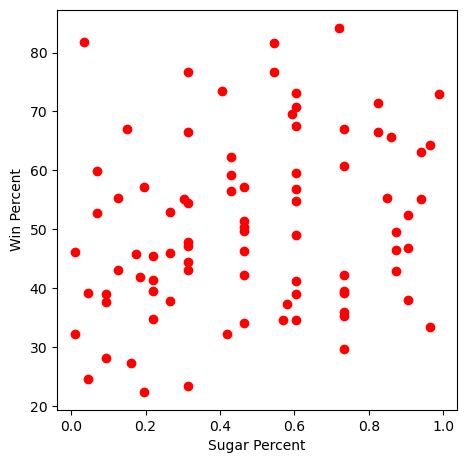

In [38]:
fig = plt.figure(figsize = (4,4))   #creates a blank canvas, but now i took control of the figure size!  
ax = fig.add_axes([0,0,1,1]) #creates an axes - (starting pt x, starting pt y, fractional size x, fractional size y)
ax.plot(sugar_percent,win_percent,'ro')
ax.set_xlabel('Sugar Percent')
ax.set_ylabel('Win Percent')
#ax.set_xlim([0,100])
#ax.set_ylim([0,100])
plt.show()

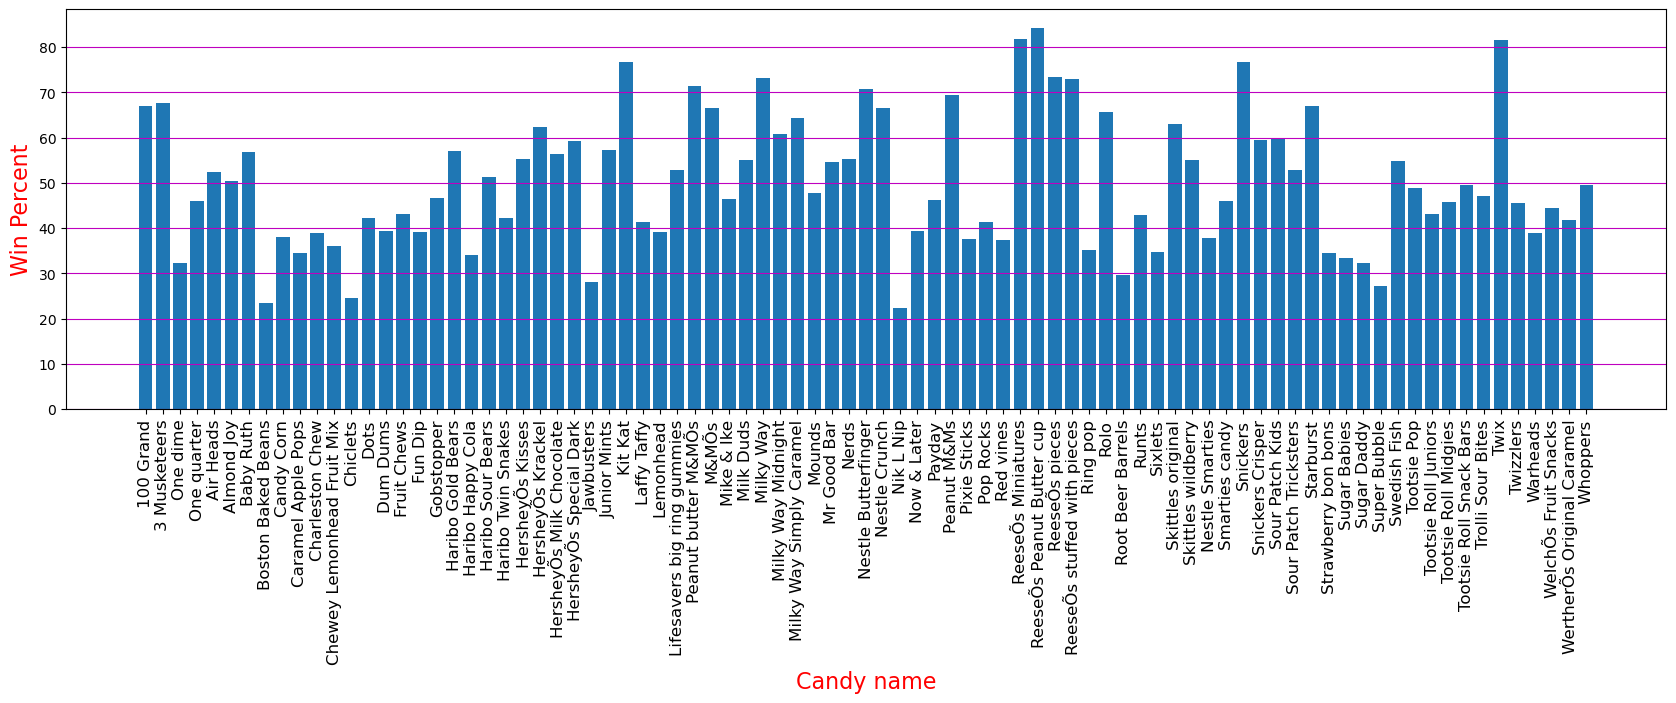

In [39]:
fig = plt.figure(figsize = (16,4))   #creates a blank canvas, but now i took control of the figure size!  
ax = fig.add_axes([0,0,1,1]) #creates an axes - (starting pt x, starting pt y, fractional size x, fractional size y)
ax.bar(candyname,win_percent)
ncandy = len(candyname) # here I used len to figure out how many entries are in candyname 
ax.set_xticks(range(ncandy),candyname,rotation = 'vertical',fontsize='12') # here i first used numeric xticks using the range function with 1 tick for each candy name, then i provided the candyname variable to replace the numeric labels.  
                                                                          #i also rotated the labels to be vertical, and shrank the fontsize to 8.    
ax.set_xlabel('Candy name',fontsize=16,color='red')
ax.set_ylabel('Win Percent',fontsize=16,color='red')
#ax.set_xlim([0,100])
#ax.set_ylim([0,100])
ax.grid(True,axis='y',color='m')
plt.show()

Thats a hard graph to read, because I usually am most interested in the winners and losers. 
Sorting the items in a graph can sometimes help with clarity  

In [8]:
winorder = np.flip(np.argsort(win_percent))

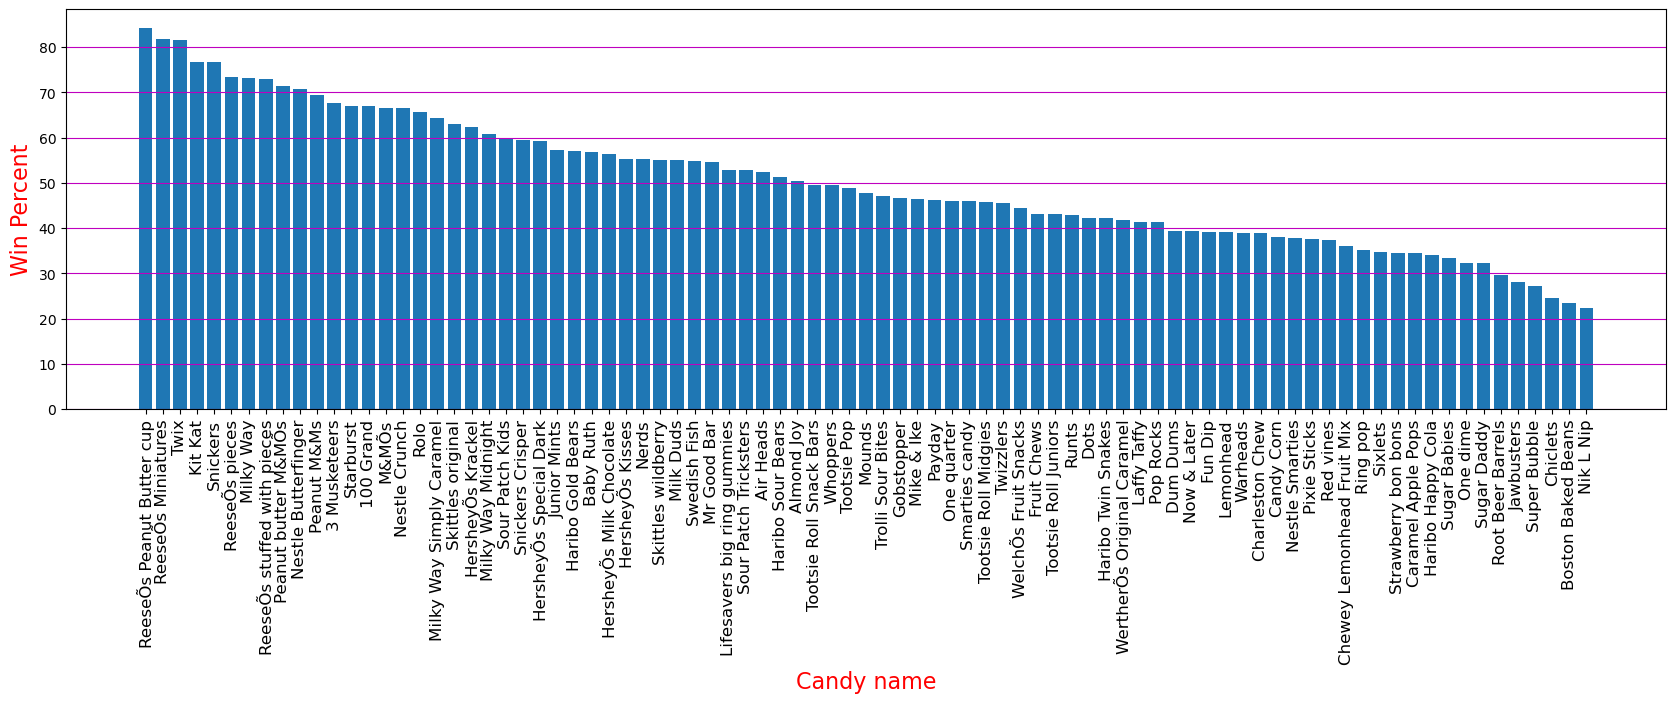

In [9]:
fig = plt.figure(figsize = (16,4))   #creates a blank canvas, but now i took control of the figure size!  
ax = fig.add_axes([0,0,1,1]) #creates an axes - (starting pt x, starting pt y, fractional size x, fractional size y)
ax.bar(candyname[winorder],win_percent[winorder])
ncandy = len(candyname) # here I used len to figure out how many entries are in candyname 
ax.set_xticks(range(ncandy),candyname[winorder],rotation = 'vertical',fontsize='12') # here i first used numeric xticks using the range function with 1 tick for each candy name, then i provided the candyname variable to replace the numeric labels.  
                                                                          #i also rotated the labels to be vertical, and shrank the fontsize to 8.    
ax.set_xlabel('Candy name',fontsize=16,color='red')
ax.set_ylabel('Win Percent',fontsize=16,color='red')
#ax.set_xlim([0,100])
#ax.set_ylim([0,100])
ax.grid(True,axis='y',color='m')
plt.show()

### Creating a pandas data frame 

Creating a pandas data frame has syntax similar to creating a dictionary

You can simply create an empty data frame 

In [10]:
mydf = pd.DataFrame()

Then use keywords for each array or list you want to add to the data frame.  The keywords will automatically also become to column headers in the table.     

In [11]:
mydf['candy'] = candyname
mydf['win'] = win_percent
mydf.to_csv('test.csv')